In [1]:
#Course  : DSC530
#Name : Tejashri Bhilare
#Week 7

#Chapter 5

#Exercises :  Page 89: 7-1   , Page 99: 8-1  , Page 99: 8-2

In [2]:
# Lets start with exercise 7.1
#import required libraries

from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [3]:


import numpy as np


import thinkstats2
import thinkplot

In [4]:
#Scatter plots
# Here will start with the data from the BRFSS again.

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

In [5]:
import brfss


df = brfss.ReadBrfss(nrows=None) 

In [6]:
#The following function selects a random subset of a DataFrame.

def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

In [7]:
# Here we will extract the height in cm and the weight in kg of the respondents in the sample.

sample = SampleRows(df, 5000)
heights, weights = sample.htm3, sample.wtkg2

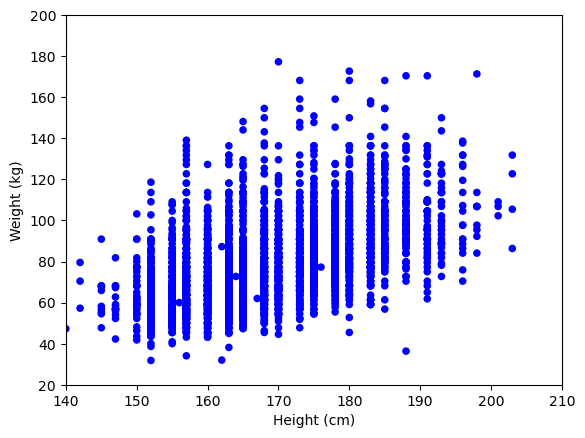

In [8]:
#Here's a simple scatter plot with alpha=1, so each data point is fully saturated.

thinkplot.Scatter(heights, weights, alpha=1)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

In [10]:
# The version of Jitter in the book uses noise with a uniform distribution. 
# Here we are using a normal distribution. The normal distribution does a better job of blurring artifacts, but the uniform distribution might be more true to the data.

def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [11]:
#Heights were probably rounded off to the nearest inch, which is 2.8 cm, so here we will add random values from -1.4 to 1.4.

heights = Jitter(heights, 1.4)
weights = Jitter(weights, 0.5)

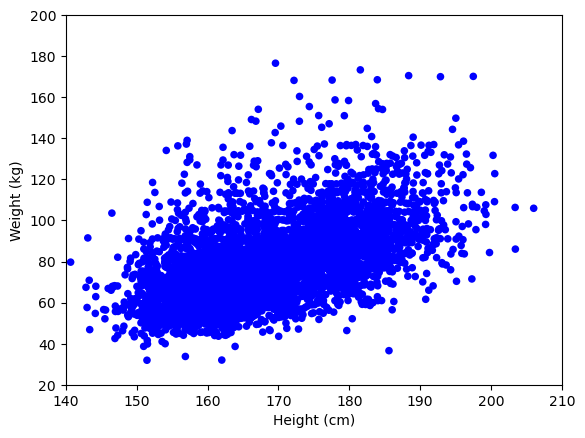

In [12]:
# Display jittered data

thinkplot.Scatter(heights, weights, alpha=1.0)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

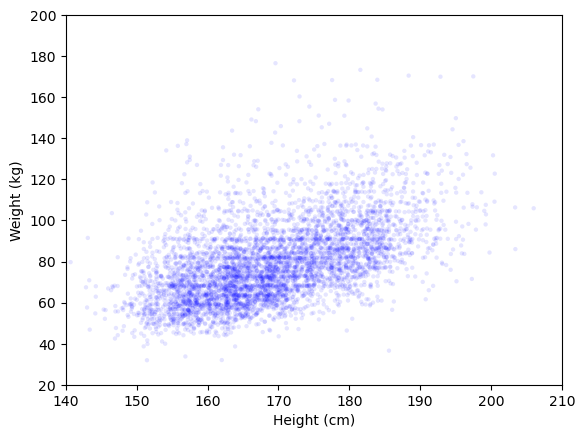

In [13]:
#The columns are gone, but now we have a different problem: saturation. Where there are many overlapping points, the plot is not as dark as it should be, which means that the outliers are darker than they should be, which gives the impression that the data are more scattered than they actually are.

#We can try to solve the saturation problem by adjusting alpha and the size of the markers, s.

thinkplot.Scatter(heights, weights, alpha=0.1, s=10)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

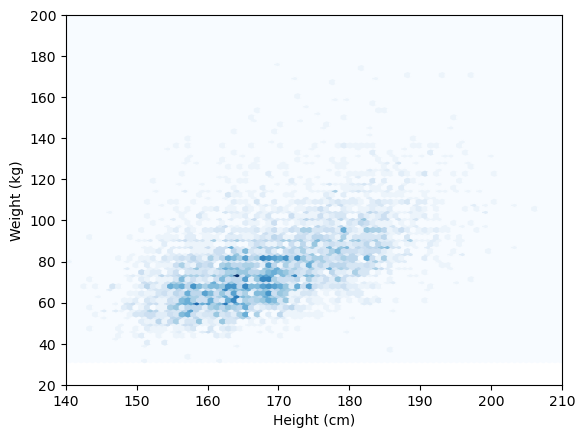

In [14]:
#Now an alternative to a scatter plot is something like a `HexBin` plot, which breaks the plane into bins, counts the number of respondents in each bin, and colors each bin in proportion to its count.

thinkplot.HexBin(heights, weights)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

In [ ]:
# Here the above binned plot does a pretty good job of showing the location and shape of the distribution. It obscures the row and column effects, which may or may not be a good thing.

In [ ]:
#So far we have been working with a subset of only 5000 respondents. When we include the entire dataset, making an effective scatter plot can be tricky. As an exercise, experiment with Scatter and HexBin to make a plot that represents the entire dataset well.

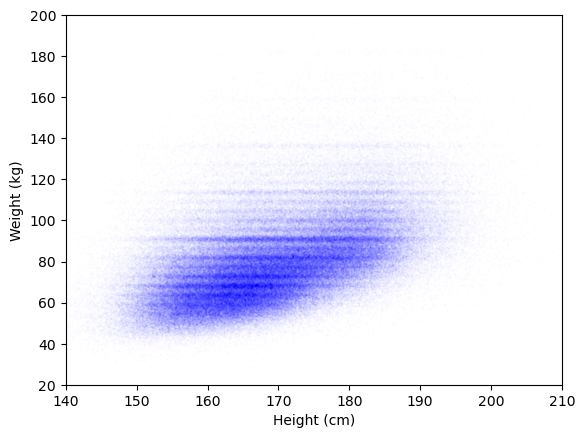

In [15]:
# Solution

# With smaller markers, I needed more aggressive jittering to
# blur the measurement artifacts

# With this dataset, using all of the rows might be more trouble
# than it's worth.  Visualizing a subset of the data might be
# more practical and more effective.

heights = Jitter(df.htm3, 2.8)
weights = Jitter(df.wtkg2, 1.0)

thinkplot.Scatter(heights, weights, alpha=0.01, s=2)
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

In [17]:
#Plotting percentiles¶
#Sometimes a better way to get a sense of the relationship between variables is to divide the dataset into groups using one variable, and then plot percentiles of the other variable.

#First we will  drop any rows that are missing height or weight.

cleaned = df.dropna(subset=['htm3', 'wtkg2'])

In [18]:
#Then we will divide the dataset into groups by height.

bins = np.arange(135, 210, 5)
indices = np.digitize(cleaned.htm3, bins)
groups = cleaned.groupby(indices)

In [19]:
#Here are the number of respondents in each group:

for i, group in groups:
    print(i, len(group))

0 305
1 228
2 477
3 2162
4 18759
5 45761
6 70610
7 72138
8 61725
9 49938
10 43555
11 20077
12 7784
13 1777
14 405
15 131


In [20]:
#Lets compute the CDF of weight within each group.

mean_heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

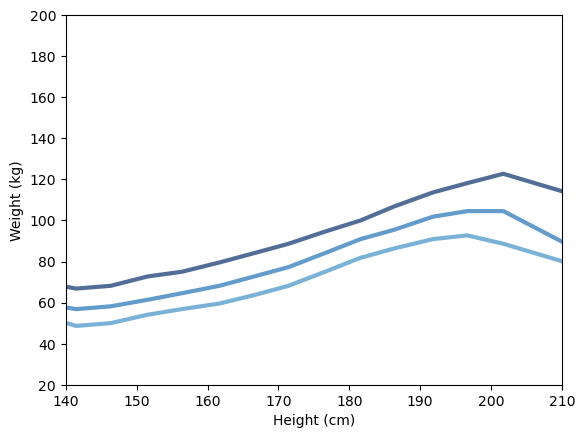

In [21]:
#And then extract the 25th, 50th, and 75th percentile from each group.

for percent in [75, 50, 25]:
    weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(mean_heights, weight_percentiles, label=label)
    
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[140, 210, 20, 200],
                 legend=False)

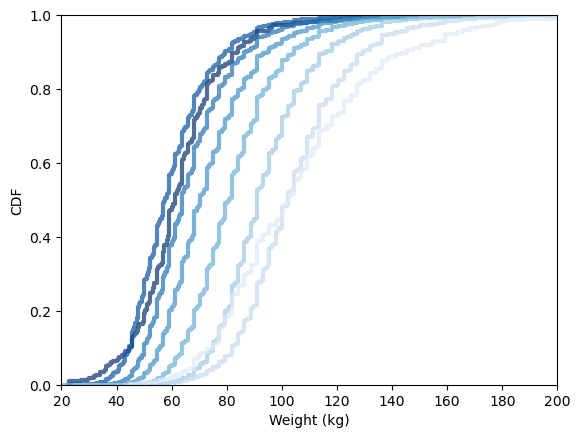

In [22]:
#Yet another option is to divide the dataset into groups and then plot the CDF for each group. As an exercise, divide the dataset into a smaller number of groups and plot the CDF for each group.

# Solution

bins = np.arange(140, 210, 10)
indices = np.digitize(cleaned.htm3, bins)
groups = cleaned.groupby(indices)
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

thinkplot.PrePlot(len(cdfs))
thinkplot.Cdfs(cdfs)
thinkplot.Config(xlabel='Weight (kg)',
                 ylabel='CDF',
                 axis=[20, 200, 0, 1],
                 legend=False)

In [23]:
#Correlation
#The following function computes the covariance of two variables using NumPy's dot function.

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [24]:
heights, weights = cleaned.htm3, cleaned.wtkg2
Cov(heights, weights)

103.3329085769776

In [25]:
#Covariance is useful for some calculations, but it doesn't mean much by itself.
#The coefficient of correlation is a standardized version of covariance that is easier to interpret.

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [26]:
#The correlation of height and weight is about 0.51, which is a moderately strong correlation.

Corr(heights, weights)

0.5087364789734607

In [27]:
#NumPy provides a function that computes correlations, too:

np.corrcoef(heights, weights)

array([[1.        , 0.50873648],
       [0.50873648, 1.        ]])

In [ ]:
#The result is a matrix with self-correlations on the diagonal (which are always 1), and cross-correlations on the off-diagonals (which are always symmetric).

#Pearson's correlation is not robust in the presence of outliers, and it tends to underestimate the strength of non-linear relationships.

#Spearman's correlation is more robust, and it can handle non-linear relationships as long as they are monotonic. Here's a function that computes Spearman's correlation:

In [28]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [29]:
#For heights and weights, Spearman's correlation is a little higher:

SpearmanCorr(heights, weights)

0.5405846262320476

In [30]:
#A Pandas Series provides a method that computes correlations, and it offers spearman as one of the options.

def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [31]:
#The result is the same as for the one we wrote.

SpearmanCorr(heights, weights)

0.5405846262320491

In [ ]:
#An alternative to Spearman's correlation is to transform one or both of the variables in a way that makes the relationship closer to linear, and the compute Pearson's correlation.

In [32]:
Corr(cleaned.htm3, np.log(cleaned.wtkg2))

0.5317282605983452

In [ ]:
#Exercises
#Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. 
#How would you characterize the relationship between these variables?

In [36]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)

Downloaded nsfg.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [37]:
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

In [38]:
# Solution

ages = live.agepreg
weights = live.totalwgt_lb
print('Corr', Corr(ages, weights))
print('SpearmanCorr', SpearmanCorr(ages, weights))

Corr 0.06883397035410908
SpearmanCorr 0.09461004109658226


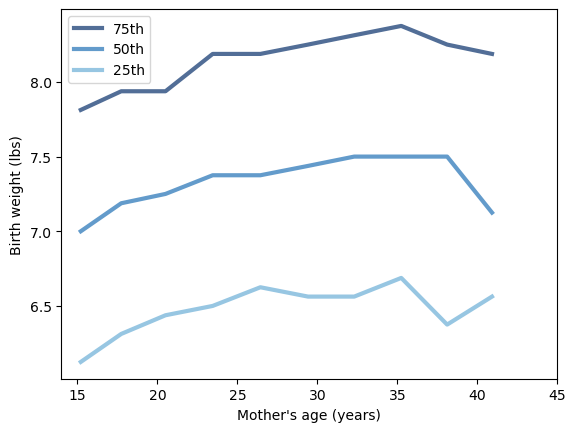

In [39]:
# Solution

def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)
    
BinnedPercentiles(live)

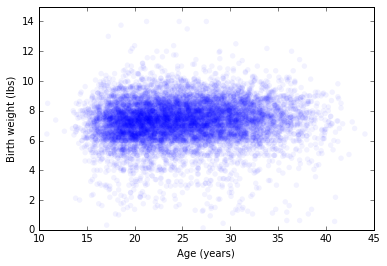

In [31]:
# Solution

def ScatterPlot(ages, weights, alpha=1.0, s=20):
    """Make a scatter plot and save it.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)
    
ScatterPlot(ages, weights, alpha=0.05, s=10)

In [40]:
# Solution

# My conclusions:

# 1) The scatterplot shows a weak relationship between the variables but
#    it is hard to see clearly.

# 2) The correlations support this.  Pearson's is around 0.07, Spearman's
#    is around 0.09.  The difference between them suggests some influence
#    of outliers or a non-linear relationsip.

# 3) Plotting percentiles of weight versus age suggests that the
#    relationship is non-linear.  Birth weight increases more quickly
#    in the range of mother's age from 15 to 25.  After that, the effect
#    is weaker.

In [1]:
# Page 99: 8-1 Exercise


from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot



In [2]:
#Root mean squared error is one of several ways to summarize the average error of an estimation process.

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)



In [4]:
#The following function simulates experiments where we try to estimate the mean of a population based on a sample with size n=7. 
# We run iters=1000 experiments and collect the mean and median of each sample.

import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3883404796402798
rmse median 0.47304737051520757


In [6]:
#Estimating variance

#The following function computes the mean error for a collection of estimates.

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [7]:
#The following function simulates experiments where we try to estimate the variance of a population based on a sample with size n=7. 


def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.15235552630170426
mean error unbiased -0.011081447351988315


In [9]:
#The sampling distribution

#The following function simulates experiments where we estimate the mean of a population using , and returns a list of estimates, one from each experiment.

def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

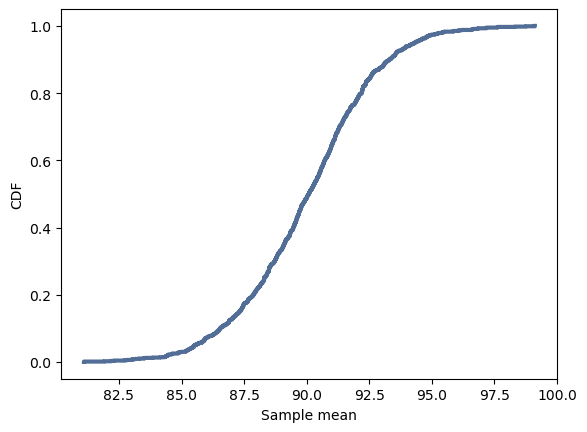

In [10]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

In [11]:
#calculating mean

np.mean(xbars)

90.01424452762402

In [13]:
#An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.52666230386255, 94.32701824164795)

In [14]:
#And here the RMSE of the sample means is called the standard error.

stderr = RMSE(xbars, 90)
stderr

2.645019765395811

In [15]:
#Estimating rates

#The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample.

def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.0860554029504144
rmse Lm 2.7389999784500243
mean error L 0.33609459780225975
mean error Lm 0.5471224693996534


In [17]:
#Ex 8.1

#In this chapter we used and median to estimate µ, and found that yields lower MSE. Also, we used and to estimate σ, and found that is biased and unbiased. Run similar experiments to see if and median are biased estimates of µ. Also check whether or yields a lower MSE.


# Solution

def Estimate4(n=7, iters=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))
    
Estimate4()

Experiment 1
mean error xbar -0.0021585801487342625
mean error median -0.0012989178865005053


In [18]:
# Solution

def Estimate5(n=7, iters=100000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

Experiment 2
RMSE biased 0.5154766913200084
RMSE unbiased 0.5776408582161815


In [ ]:
# Solution

# My conclusions:

# 1) xbar and median yield lower mean error as m increases, so neither
# one is obviously biased, as far as we can tell from the experiment.

# 2) The biased estimator of variance yields lower RMSE than the unbiased
# estimator, by about 10%.  And the difference holds up as m increases.


standard error 0.7965070149129918
confidence interval (1.2906810021093849, 3.6094997822146393)


0.7965070149129918

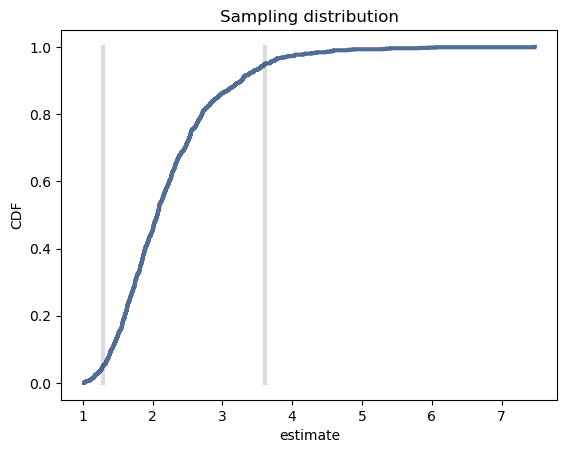

In [20]:
#Ex 8.2

#Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

#Repeat the experiment with a few different values of n and make a plot of standard error versus n.


# Solution

def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

SimulateSample()

In [ ]:
# Solution

# My conclusions:

# 1) With sample size 10:

# standard error 0.762510819389
# confidence interval (1.2674054394352277, 3.5377353792673705)

# 2) As sample size increases, standard error and the width of
#    the CI decrease:

# 10      0.90    (1.3, 3.9)
# 100     0.21    (1.7, 2.4)
# 1000    0.06    (1.9, 2.1)

# All three confidence intervals contain the actual value, 2.